# Teorema da Amostragem

### Questão 1 
O objetivo desta prática é simular a discretização de um sinal contínuo com diferentes períodos diferentes de amostragem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, butter, freqz, lfilter

(a) Mostre o sinal $y(t)$ para $t = [0, 2]$ usando plot.

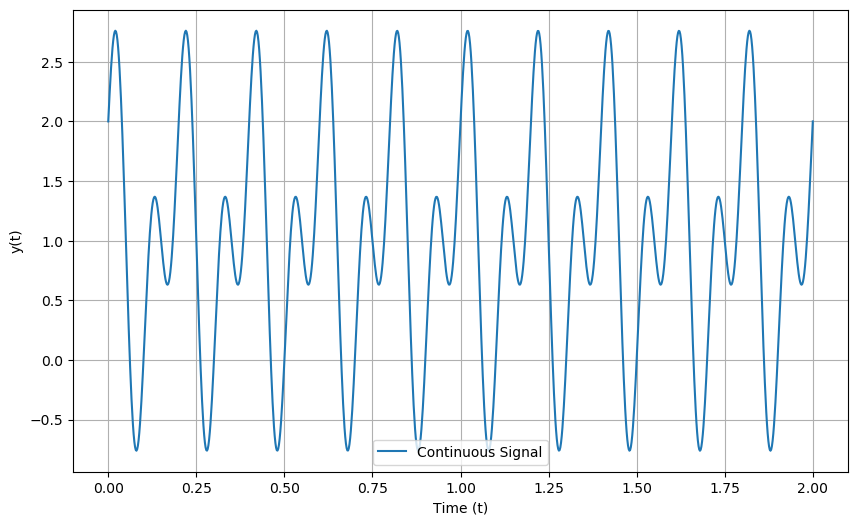

In [2]:
# Initial parameters of the signal 
omega_n = 10 * np.pi
t_continuous = np.linspace(0, 2, 1000)  # Continuous time
y_continuous = 1 + np.cos(omega_n * t_continuous) + np.sin(2 * omega_n * t_continuous)

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

(b) Obtenha o espectro de frequência de $y(t)$ usando fft. Qual a frequencia máxima do sinal?

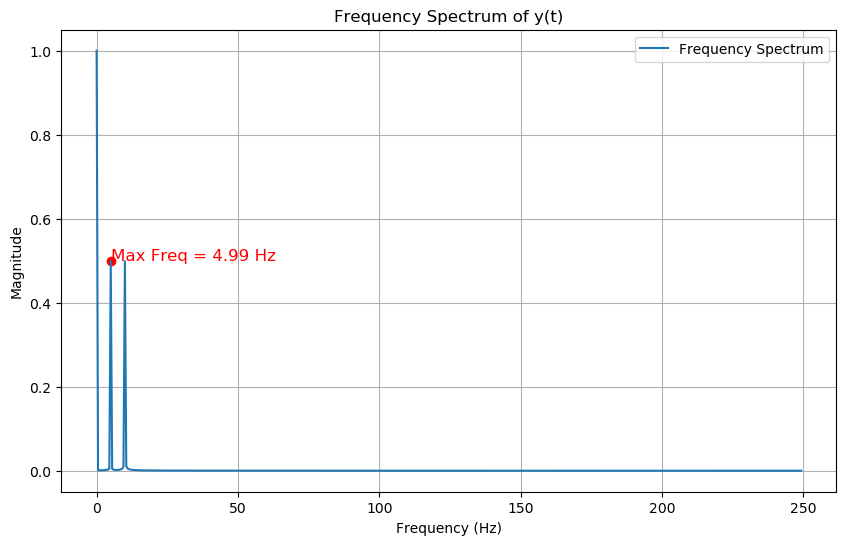

In [3]:
# Compute the FFT
y_fft = np.fft.fft(y_continuous)
y_fft_magnitude = np.abs(y_fft) / len(t_continuous)  # Normalize
frequencies = np.fft.fftfreq(len(t_continuous), t_continuous[1] - t_continuous[0])

# Take the positive half of the spectrum
half_n = len(frequencies) // 2
frequencies = frequencies[:half_n]
y_fft_magnitude = y_fft_magnitude[:half_n]

# Find the maximum frequency component
max_freq_index = np.argmax(y_fft_magnitude[1:]) + 1  # Ignoring the DC component at index 0
max_freq = frequencies[max_freq_index]
max_magnitude = y_fft_magnitude[max_freq_index]

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, y_fft_magnitude, label='Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of y(t)')
plt.grid(True)
plt.legend()

# Mark the maximum frequency
plt.scatter(max_freq, max_magnitude, color='red')
plt.text(max_freq, max_magnitude, f'Max Freq = {max_freq:.2f} Hz', fontsize=12, color='red')

plt.show()

(c) Faça amostragem do sinal na frequência de Nyquist ($f_s = 2f_M$) e mostre o resultado usando stem e compare com o sinal contínuo. Usando apenas as amostras do sinal é possível reconstruir de forma única o sinal contínuo? Justifique.

*Resposta:* Sim, é possível reconstruir de forma única o sinal usando apenas as amostras, contanto que o sinal tenha sido amostrado na frequência de Nyquist ou acima dela. Como falado em aula, essa capacidade de reconstrução é garantida pelo Teorema da Amostragem.

/tmp/ipykernel_58892/4070913104.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


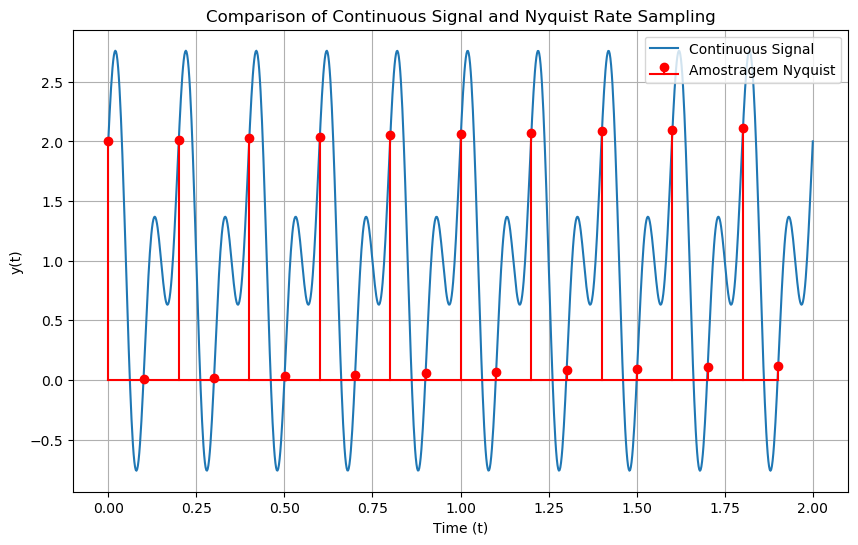

In [4]:
# Nyquist frequency and sampling period
nyquist_freq = 2 * max_freq
sampling_period = 1 / nyquist_freq

# Sampled signal at Nyquist frequency
t_sampled = np.arange(0, 2, sampling_period)
y_sampled = 1 + np.cos(omega_n * t_sampled) + np.sin(2 * omega_n * t_sampled)

# Plot continuous and sampled signals for comparison
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Comparison of Continuous Signal and Nyquist Rate Sampling')
plt.grid(True)
plt.show()

(d) Faça amostragem do sinal numa frequência abaixo da de Nyquist ($f_s < 2f_M$) e mostre o resultado usando stem e compare com o sinal contínuo. Obtenha também o sinal aliasing ($ω_b = ω_n − ω_s$) e compare.

/tmp/ipykernel_58892/2906900868.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


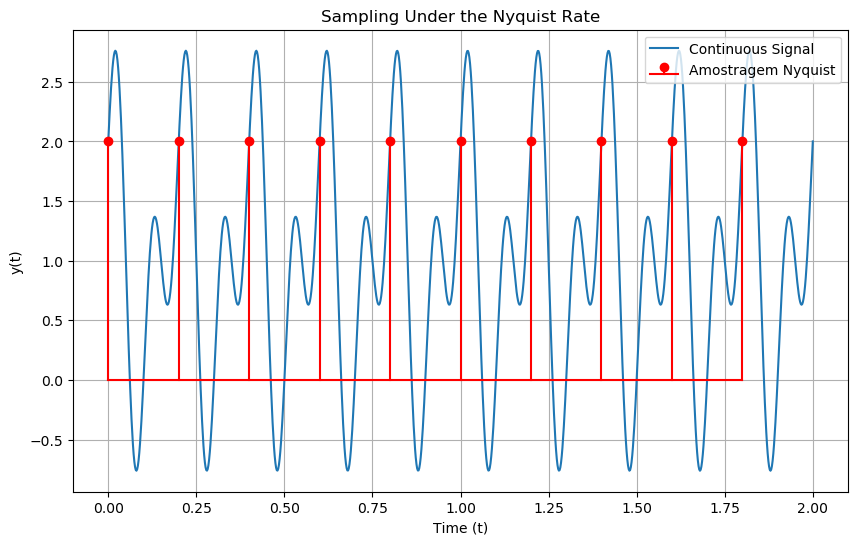

/tmp/ipykernel_58892/2906900868.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled, y_aliased, linefmt='g-', markerfmt='ro', basefmt='g-', label='Aliased Signal')


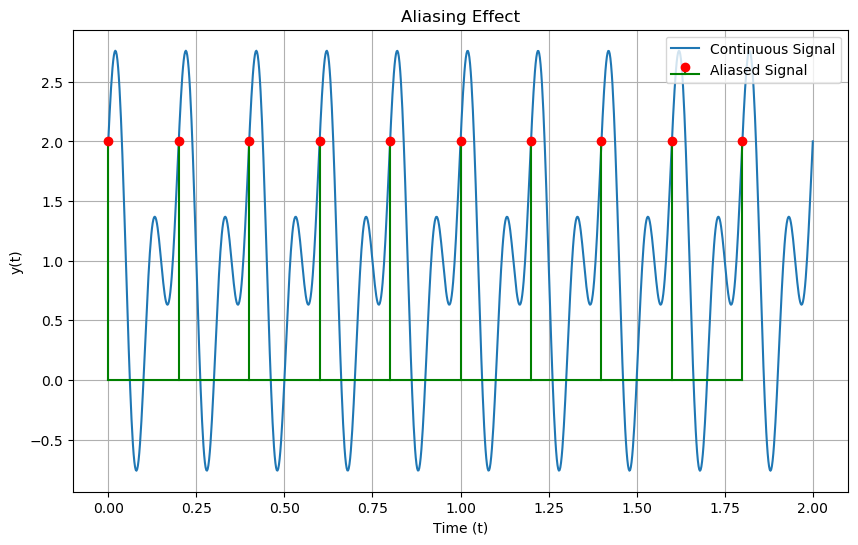

In [5]:
sampling_freq = 5
sampling_period = 1 / sampling_freq

t_sampled = np.arange(0, 2, sampling_period)
y_sampled = 1 + np.cos(omega_n * t_sampled) + np.sin(2 * omega_n * t_sampled)

# Calculate the aliasing frequency
omega_s = 2 * np.pi * sampling_freq  
omega_b = omega_n - omega_s  # Aliasing frequency

y_aliased = 1 + np.cos(omega_b * t_sampled) + np.sin(2 * omega_b * t_sampled)

# Plot the continuous signal and the aliased sampled signal
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Sampling Under the Nyquist Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled, y_aliased, linefmt='g-', markerfmt='ro', basefmt='g-', label='Aliased Signal')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Aliasing Effect')
plt.grid(True)
plt.show()

(e) Faça amostragem do sinal numa frequência acima da de Nyquist ($f_s > 2f_M$) e mostre o resultado usando stem e compare com o sinal contínuo.

/tmp/ipykernel_58892/692451325.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


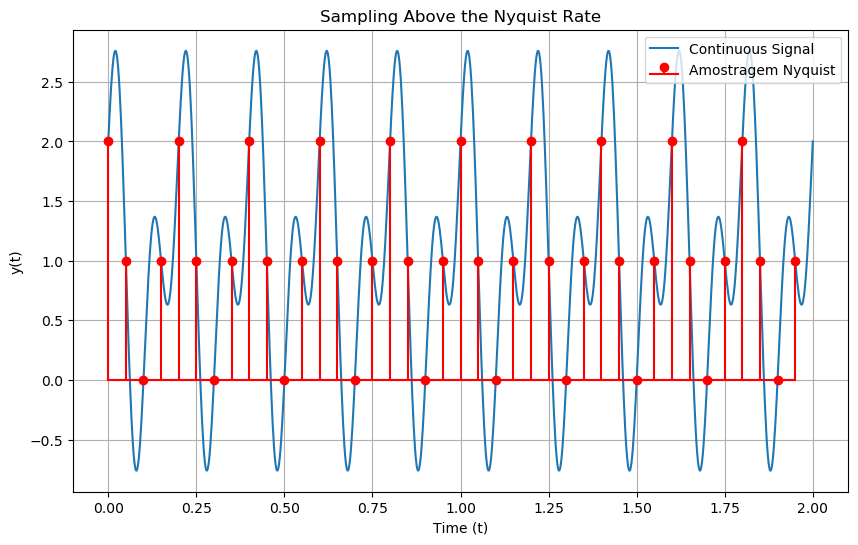

In [6]:
sampling_freq = 20
sampling_period = 1 / sampling_freq

t_sampled = np.arange(0, 2, sampling_period)
y_sampled = 1 + np.cos(omega_n * t_sampled) + np.sin(2 * omega_n * t_sampled)

# Calculate the aliasing frequency
omega_s = 2 * np.pi * sampling_freq  
omega_b = omega_n - omega_s  # Aliasing frequency

y_aliased = 1 + np.cos(omega_b * t_sampled) + np.sin(2 * omega_b * t_sampled)

# Plot the continuous signal and the aliased sampled signal
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Sampling Above the Nyquist Rate')
plt.grid(True)
plt.show()

### Questão 2 
Considerando o sinal: $$y(t) = \cos(2\pi t)$$

(a) Mostre o sinal em tempo contínuo no intervalo $t = [0, 3]$ usando plot.

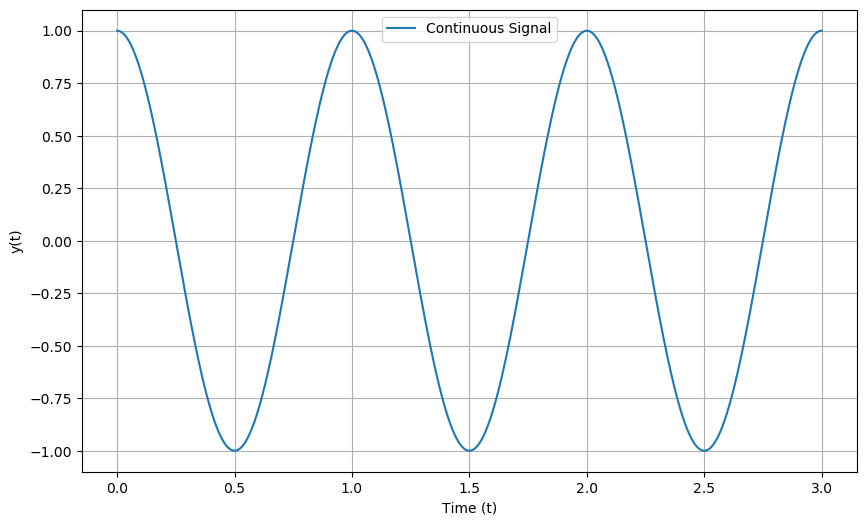

In [7]:
# Initial parameters of the signal 
t_continuous = np.linspace(0, 3, 1000)  # Continuous time
y_continuous = np.cos(2 * np.pi * t_continuous)

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

(b) Obtenha o espectro de frequência usando fft.

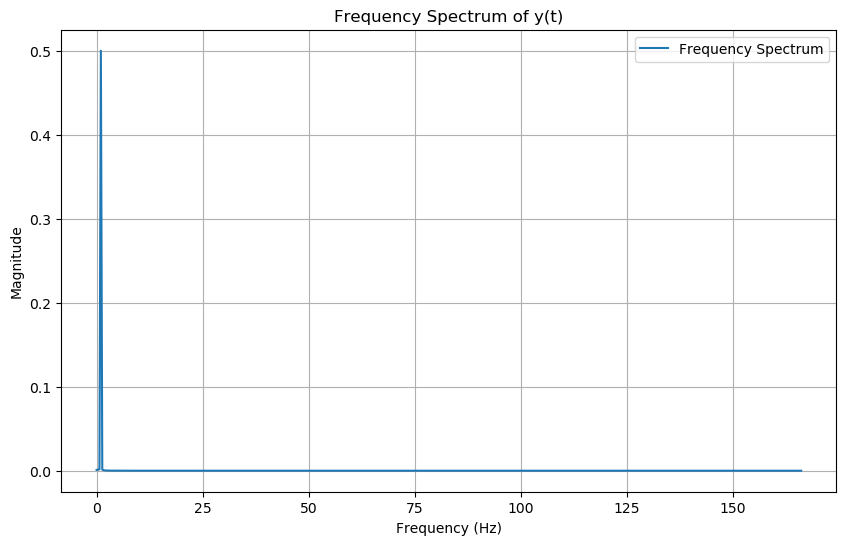

In [8]:
# Compute the FFT
y_fft = np.fft.fft(y_continuous)
y_fft_magnitude = np.abs(y_fft) / len(t_continuous)  # Normalize
frequencies = np.fft.fftfreq(len(t_continuous), t_continuous[1] - t_continuous[0])

# Take the positive half of the spectrum
half_n = len(frequencies) // 2
frequencies = frequencies[:half_n]
y_fft_magnitude = y_fft_magnitude[:half_n]

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, y_fft_magnitude, label='Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of y(t)')
plt.grid(True)
plt.legend()

(c) Faça a amostragem do sinal usando a frequência de Nyquist para obter $y_a[k]$ e mostre usando usando stem.

/tmp/ipykernel_58892/2853109553.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_fm, y_sampled_fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


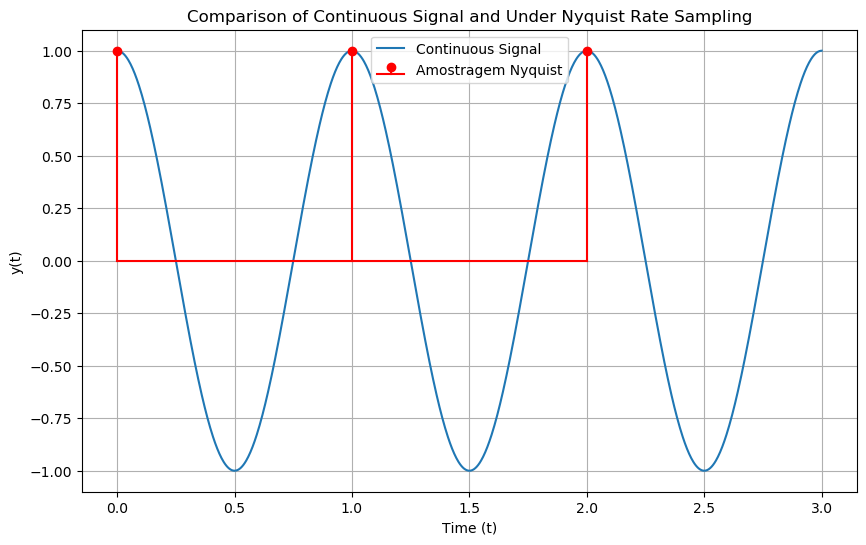

/tmp/ipykernel_58892/2853109553.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


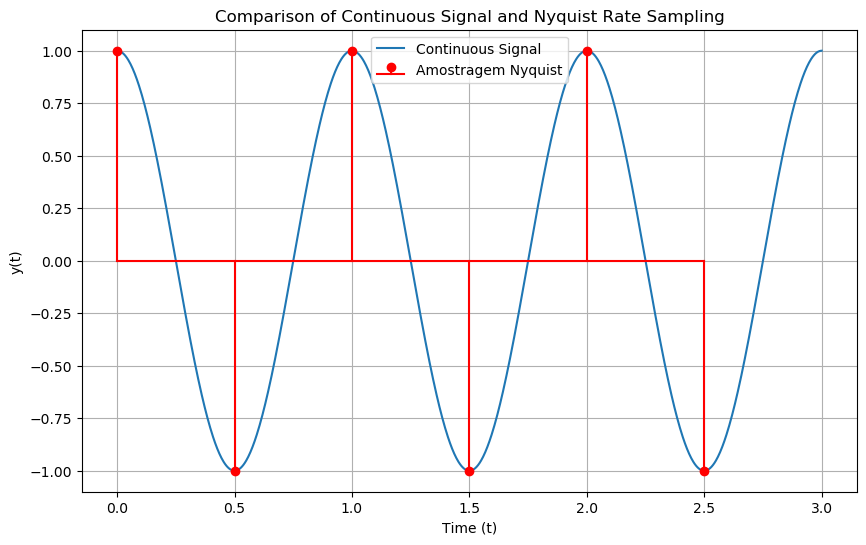

/tmp/ipykernel_58892/2853109553.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')


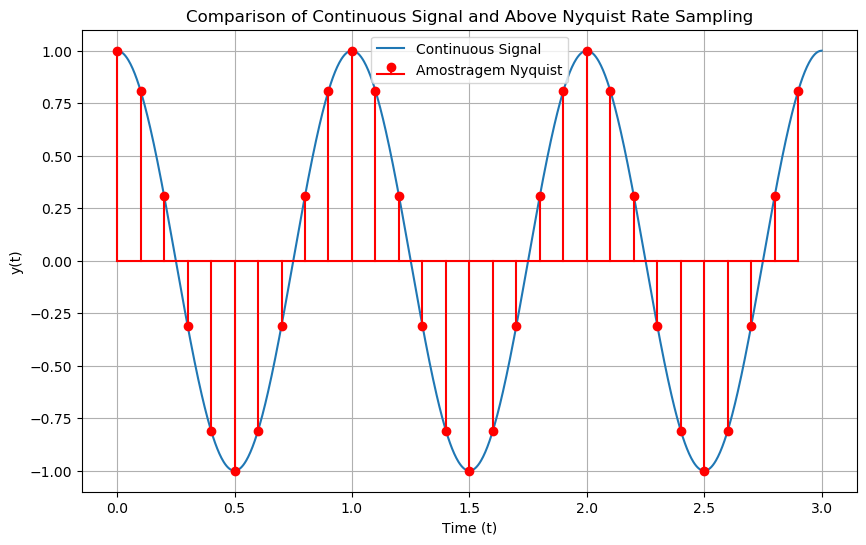

In [9]:
sampling_freq = 1 
sampling_period = 1 / sampling_freq

t_sampled_fm = np.arange(0, 3, sampling_period)
y_sampled_fm = np.cos(2 * np.pi * t_sampled_fm)

# Plot continuous and sampled signals for comparison
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled_fm, y_sampled_fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Comparison of Continuous Signal and Under Nyquist Rate Sampling')
plt.grid(True)
plt.show()

# Nyquist frequency and sampling period
sampling_freq = 2 
sampling_period = 1 / sampling_freq

# Sampled signal at Nyquist frequency
t_sampled_2fm = np.arange(0, 3, sampling_period)
y_sampled_2fm = np.cos(2 * np.pi * t_sampled_2fm)

# Plot continuous and sampled signals for comparison
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Comparison of Continuous Signal and Nyquist Rate Sampling')
plt.grid(True)
plt.show()

sampling_freq = 10 
sampling_period = 1 / sampling_freq

t_sampled_10fm = np.arange(0, 3, sampling_period)
y_sampled_10fm = np.cos(2 * np.pi * t_sampled_10fm)

# Plot continuous and sampled signals for comparison
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Comparison of Continuous Signal and Above Nyquist Rate Sampling')
plt.grid(True)
plt.show()

(d) Construa o sinal $y^{∗}_a(t)$ (usando trem de impulsos) e mostre usando stem.

/tmp/ipykernel_58892/1634480196.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')


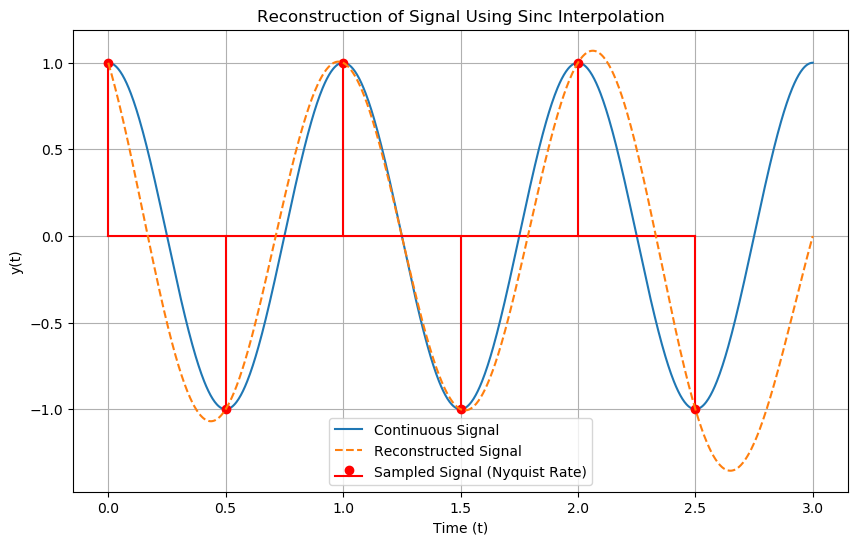

/tmp/ipykernel_58892/1634480196.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (above Nyquist Rate)')


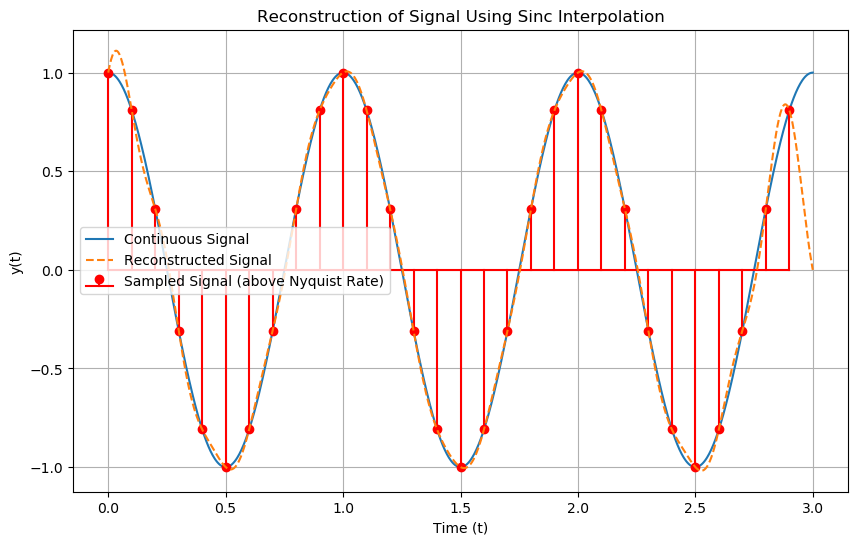

In [10]:
def reconstruction(t, t_samples, y_samples):
    T = t_samples[1] - t_samples[0]
    sinc = np.sinc((t[:, np.newaxis] - t_samples[np.newaxis, :]) / T)
    return np.dot(sinc, y_samples)

y_reconstructed_2fm = reconstruction(t_continuous, t_sampled_2fm, y_sampled_2fm)
y_reconstructed_10fm = reconstruction(t_continuous, t_sampled_10fm, y_sampled_10fm)

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_continuous, y_reconstructed_2fm, label='Reconstructed Signal', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Reconstruction of Signal Using Sinc Interpolation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linestyle='-')
plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (above Nyquist Rate)')
plt.plot(t_continuous, y_reconstructed_10fm, label='Reconstructed Signal', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Reconstruction of Signal Using Sinc Interpolation')
plt.grid(True)
plt.show()

(e) Obtenha o espectro de $y^{∗}_a(t)$ usando fft. O que pode-se concluir com o espectro do sinal amostrado na frequencia de Nyquist?

*Resposta:* Por mais que o espectro de frequência esteja próximo ao esperado, pequenas discrepâncias podem ser observadas devido a limitações práticas na reconstrução do sinal a partir das amostras. No entanto, quando amostrado exatamente na frequência de Nyquist, o sinal reconstruído retém as principais características espectrais do sinal original.

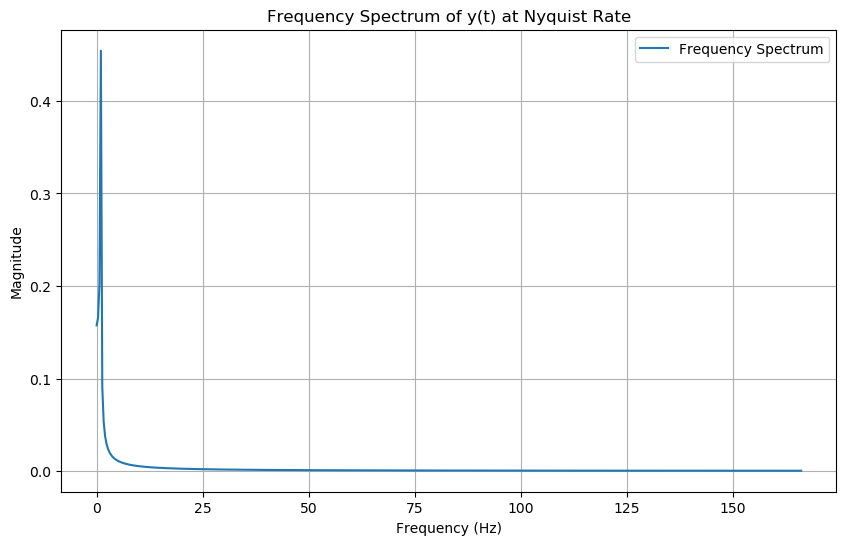

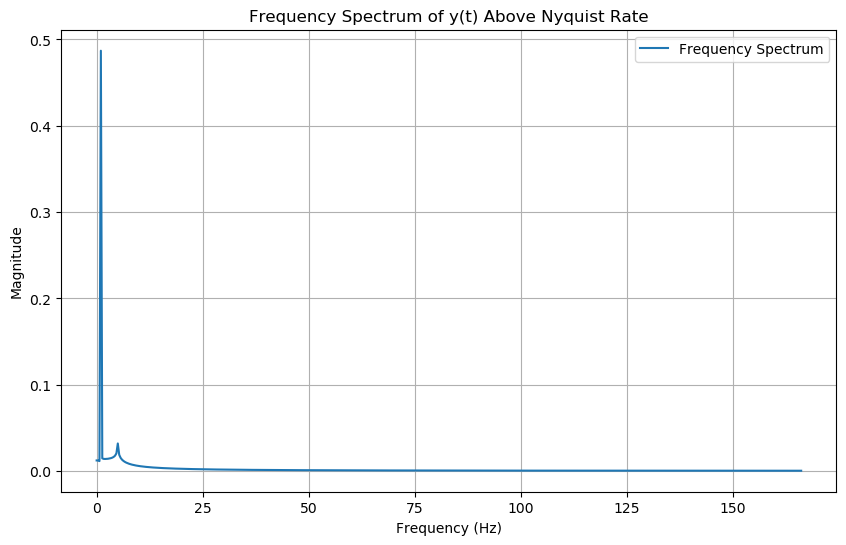

In [11]:
# Compute the FFT
y_fft = np.fft.fft(y_reconstructed_2fm)
y_fft_magnitude = np.abs(y_fft) / len(t_continuous)  # Normalize
frequencies = np.fft.fftfreq(len(t_continuous), t_continuous[1] - t_continuous[0])

# Take the positive half of the spectrum
half_n = len(frequencies) // 2
frequencies = frequencies[:half_n]
y_fft_magnitude = y_fft_magnitude[:half_n]

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, y_fft_magnitude, label='Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of y(t) at Nyquist Rate')
plt.grid(True)
plt.legend()

# Compute the FFT
y_fft = np.fft.fft(y_reconstructed_10fm)
y_fft_magnitude = np.abs(y_fft) / len(t_continuous)  # Normalize
frequencies = np.fft.fftfreq(len(t_continuous), t_continuous[1] - t_continuous[0])

# Take the positive half of the spectrum
half_n = len(frequencies) // 2
frequencies = frequencies[:half_n]
y_fft_magnitude = y_fft_magnitude[:half_n]

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, y_fft_magnitude, label='Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of y(t) Above Nyquist Rate')
plt.grid(True)
plt.legend()

(f) Repita o item anterior, porém, com 10x a frequência máxima do sinal. O que pode-se concluir com o espectro do sinal amostrado nessa nova frequência de amostragem?

*Resposta:* Quando o sinal é amostrado a uma frequência 10 vezes maior que a frequência máxima do sinal, o espectro do sinal amostrado mostra que as réplicas no domínio da frequência estão muito mais afastadas. Em geral, uma frequência de amostragem significativamente maior do que a frequência de Nyquist fornece uma melhor aproximação do sinal contínuo, capturando mais detalhes.

### Questão 3 
Obtenha a função de transferência de um filtro passa-baixa do tipo Butterworth com $f_c = 2$ e mostre a resposta em frequência.

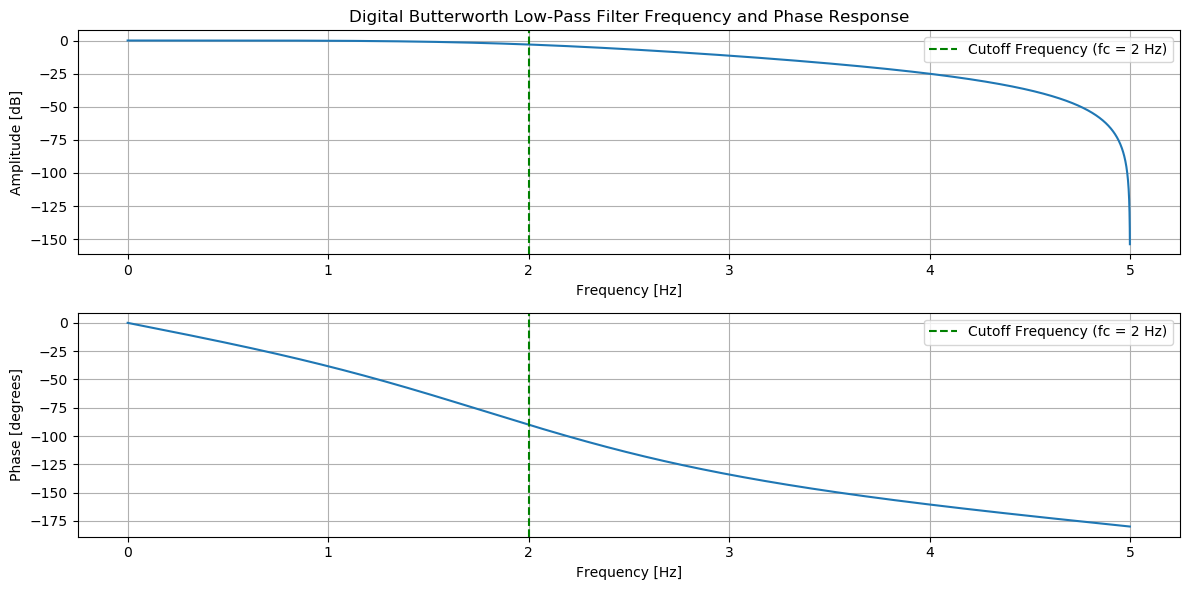

Transfer function coefficients:
Numerator (b): [0.20657208 0.41314417 0.20657208]
Denominator (a): [ 1.         -0.36952738  0.19581571]


In [12]:
# Filter design parameters
fc = 2  # Cutoff frequency in Hz
order = 2   
fs = 10  # Sampling rate in Hz

# Normalized cutoff frequency for digital filter
Wn = fc / (fs / 2)  

# Design the Butterworth low-pass filter (digital)
b, a = butter(order, Wn, btype='low', analog=False)  

# Frequency response (digital)
w, h = freqz(b, a, worN=8000, fs=fs)

# Plotting the amplitude response
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Digital Butterworth Low-Pass Filter Frequency and Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green', linestyle='--', label=f'Cutoff Frequency (fc = {fc} Hz)')
plt.legend()

# Plotting the phase response
plt.subplot(2, 1, 2)  
plt.plot(w, np.angle(h, deg=True))  
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green', linestyle='--', label=f'Cutoff Frequency (fc = {fc} Hz)')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Output the transfer function
print("Transfer function coefficients:")
print(f"Numerator (b): {b}")
print(f"Denominator (a): {a}")

### Questão 4 
Aplique o filtro passa-baixa Butterworth do item anterior no sinal amostrado no exercício 2 com frequencia $f_s = f_M$, $f_s = 2f_M$ e depois com $f_s = 10f_M$. Em qual situação foi possível recuperar o sinal com qualidade razoável? Justifique. 

*Resposta*: Quando o sinal é amostrado a uma frequência 10 vezes maior que a frequência máxima do sinal, dado que nesse caso resulta-se em um espectro que é quase uma réplica perfeita do espectro original, com menos ruído e maior precisão.

/tmp/ipykernel_58892/1665738926.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_fm, y_sampled_fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')


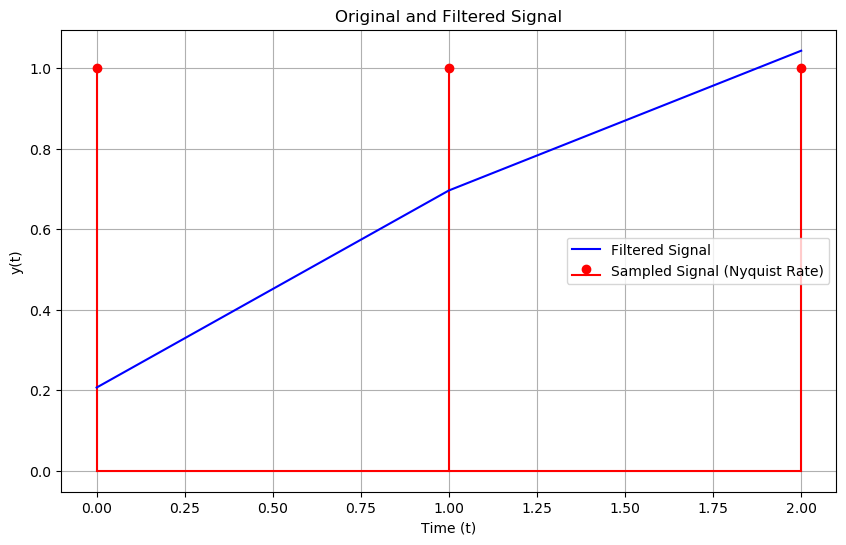

/tmp/ipykernel_58892/1665738926.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')


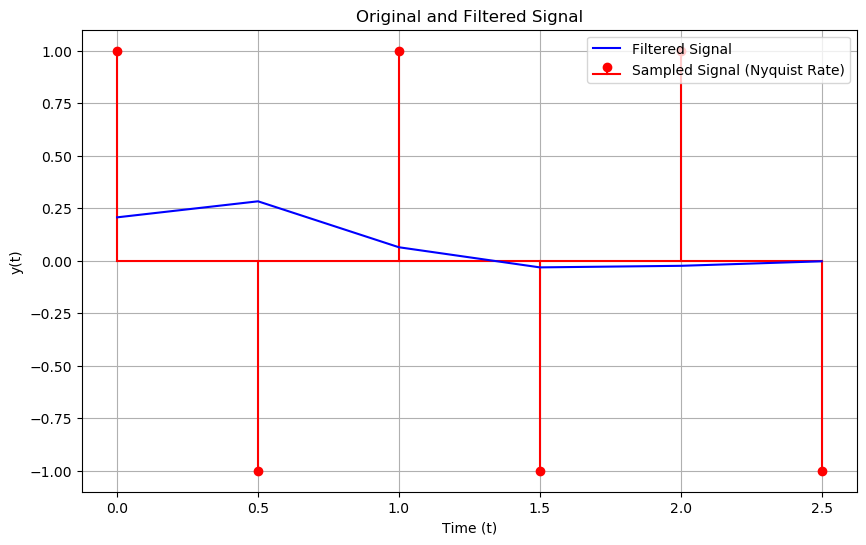

/tmp/ipykernel_58892/1665738926.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')


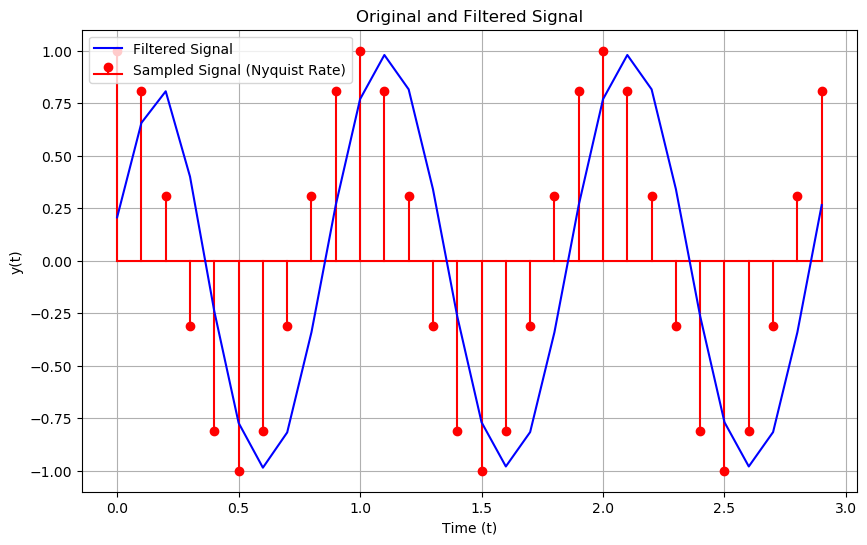

In [13]:
y_filtered = lfilter(b, a, y_sampled_fm)

plt.figure(figsize=(10, 6))
plt.stem(t_sampled_fm, y_sampled_fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_fm, y_filtered, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()

y_filtered = lfilter(b, a, y_sampled_2fm)

plt.figure(figsize=(10, 6))
plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_2fm, y_filtered, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()

y_filtered = lfilter(b, a, y_sampled_10fm)

plt.figure(figsize=(10, 6))
plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_10fm, y_filtered, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()

### Questão 5 
Repita o exercício anterior com o sinal do exercício 1. Explore diferentes estruturas de filtros passa-baixa (será necessário fazer sintonia do filtro).

/tmp/ipykernel_58892/3887821847.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')


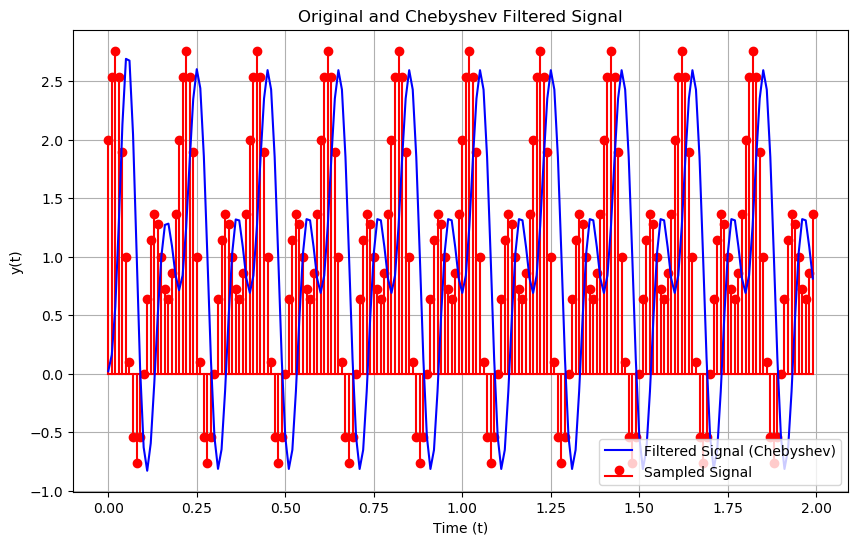

In [14]:
omega_n = 10 * np.pi
t_continuous = np.linspace(0, 2, 1000)  # Continuous time
y_continuous = 1 + np.cos(omega_n * t_continuous) + np.sin(2 * omega_n * t_continuous)

# Nyquist frequency and sampling period
sampling_freq = 100 
sampling_period = 1 / sampling_freq

# Sampled signal
t_sampled = np.arange(0, 2, sampling_period)
y_sampled = 1 + np.cos(omega_n * t_sampled) + np.sin(2 * omega_n * t_sampled)

# Filter design parameters
fc = 15  
order = 4  
ripple = 0.5  
fs = 100  

# Normalized cutoff frequency for digital filter
Wn = fc / (fs / 2) 

# Design the Chebyshev Type I low-pass filter (digital)
b, a = cheby1(order, ripple, Wn, btype='low', analog=False)  

# Apply the Chebyshev filter to the sampled signal
y_filtered = lfilter(b, a, y_sampled)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')
plt.plot(t_sampled, y_filtered, label='Filtered Signal (Chebyshev)', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Chebyshev Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()